In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('front_laser_points.csv')
dr = pd.read_csv('rear_laser_points.csv')

df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()
dr_clean = dr.replace([np.inf, -np.inf], np.nan).dropna()

T_rear = np.load('rear_laser_transform.npy')
T_front = np.load('front_laser_transform.npy')



In [2]:
front_lidar_points = df_clean.to_numpy()
rear_lidar_points = dr_clean.to_numpy()

N_front, _ = front_lidar_points.shape
N_rear, _ = rear_lidar_points.shape

front_zeros_and_ones = np.hstack([np.zeros(N_front).reshape(-1,1), np.ones(N_front).reshape(-1,1)])
rear_zeros_and_ones = np.hstack([np.zeros(N_rear).reshape(-1,1), np.ones(N_rear).reshape(-1,1)])

front_lidar_points_modified = np.hstack([front_lidar_points, front_zeros_and_ones])
rear_lidar_points_modified = np.hstack([rear_lidar_points, rear_zeros_and_ones])


In [3]:
front_lidar_points_modified_new = np.transpose(T_front @ front_lidar_points_modified.T)
rear_lidar_points_modified_new = np.transpose(T_rear @ rear_lidar_points_modified.T)

# print(front_lidar_points_modified_new)
# print('\n')
# print(rear_lidar_points_modified_new)


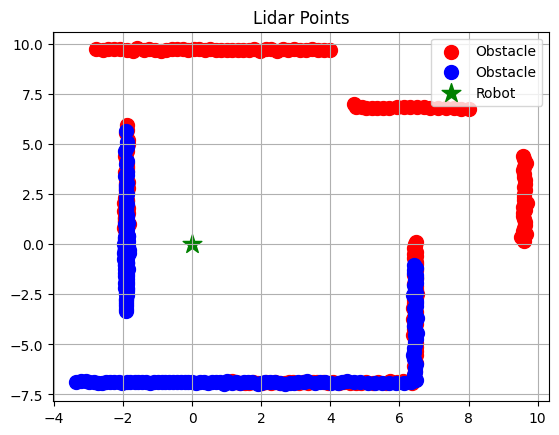

In [4]:

plt.scatter(front_lidar_points_modified_new[:,0], front_lidar_points_modified_new[:,1], marker="o", color="r", s=100, label="Obstacle")
plt.scatter(rear_lidar_points_modified_new[:,0], rear_lidar_points_modified_new[:,1], marker="o", color="b", s=100, label="Obstacle")
plt.scatter(0, 0, marker="*", color="g", s=200, label="Robot")
plt.legend()
plt.grid()
plt.title("Lidar Points")
plt.show()